x_train: (50000, 32, 32, 3)
x_train: (50000, 3072)
w1: (3072, 10)
b1: (10,)
iteration : 0/300    , loss: 1.000002  , accuracy: 0.100300
iteration : 10/300    , loss: 0.876635  , accuracy: 0.354180
iteration : 20/300    , loss: 0.842539  , accuracy: 0.372660
iteration : 30/300    , loss: 0.823615  , accuracy: 0.382080
iteration : 40/300    , loss: 0.812388  , accuracy: 0.388280
iteration : 50/300    , loss: 0.805425  , accuracy: 0.393040
iteration : 60/300    , loss: 0.800905  , accuracy: 0.395980
iteration : 70/300    , loss: 0.797821  , accuracy: 0.398860
iteration : 80/300    , loss: 0.795604  , accuracy: 0.401140
iteration : 90/300    , loss: 0.793929  , accuracy: 0.402800
iteration : 100/300    , loss: 0.792604  , accuracy: 0.404780
iteration : 110/300    , loss: 0.791514  , accuracy: 0.405840
iteration : 120/300    , loss: 0.790589  , accuracy: 0.407680
iteration : 130/300    , loss: 0.789785  , accuracy: 0.409240
iteration : 140/300    , loss: 0.789072  , accuracy: 0.410420
itera

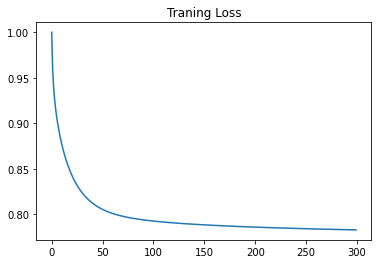

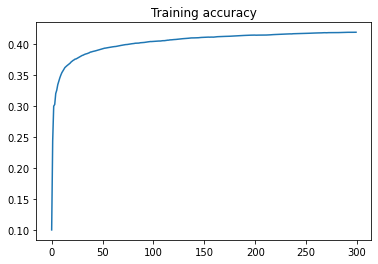

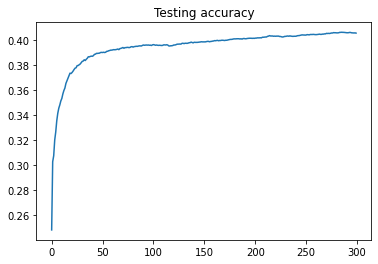

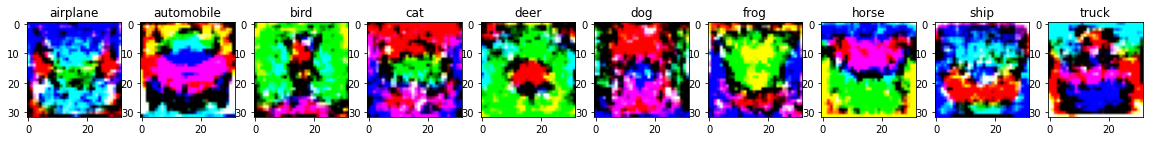

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print('x_train:', x_train.shape)
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)


batch_size = Ntr
iterations =300
lr =1.4e-2
lr_decay=0.999
reg =5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    x_tr=x_train[indices]
    y_tr=y_train[indices]

    # Forward pass
    y_pre=np.matmul(x_tr,w1) + b1
    loss=(1/batch_size)*np.square(y_pre-y_tr).sum()  + reg*(np.sum(w1*w1))
    loss_history.append(loss)
    
    # Backward pass
    dy_pre =(1/batch_size)*2.0*(y_pre-y_tr) #derivative of loss with respect to y_pre
    dw1= np.matmul(x_tr.T,dy_pre) + reg*w1   #derivative of loss with respect to w1
    db1=dy_pre.sum(axis=0)                  #derivative of loss with respect to b1
    w1-=lr*dw1   #update w1
    b1-=lr*db1  #update b1
    lr*=lr_decay    #update lr

    #traning accuracies
    train_acc=1.0 -(1/batch_size)*np.count_nonzero((np.argmax(y_tr,axis=1) - np.argmax(y_pre,axis=1)))
    train_acc_history.append(train_acc)
    #testing accuracies
    y_test_pre=np.matmul(x_test,w1) + b1
    test_acc= 1.0 - (1/Nte)*np.count_nonzero((np.argmax(y_test,axis=1) - np.argmax(y_test_pre,axis=1)))
    val_acc_history.append(test_acc)
    if t % 10==0:
        print('iteration : %d/%d    , loss: %f  , accuracy: %f'% (t,iterations,loss,train_acc))


# Printing accuracies and displaying w as images
plt1=plt.figure(1)
plt.plot(loss_history)
plt.title('Traning Loss')
plt2=plt.figure(2)
plt.plot(train_acc_history)
plt.title('Training accuracy')
plt3=plt.figure(3)
plt.plot(val_acc_history)
plt.title('Testing accuracy')
print('Traning Loss: %f'%(loss_history[-1]))
print('Training accuracy : %f'% (train_acc_history[-1]))
print('Testing accuracy : %f'% (val_acc_history[-1]))

#showing w as images
frame,ax= plt.subplots(1,K)
frame.set_size_inches(20,20)
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(K):
    img= w1[:,i].reshape(32,32,3) #reshape it to image format
    ax[i].imshow(img*1000)
    ax[i].set_title(classes[i])
plt.show()
